# Dealing with Categorical Variables

## Introduction

We now understand the intuition behind multiple linear regression. Great! However, because we'll start digging into bigger data sets with more predictors, we'll come across predictors that are slightly different from what we've seen before. Welcome to the wonderous world of categorical variables!

## Objectives
You will be able to:
* Understand what categorical variables are
* Understand the need to create dummy variables for categorical predictors 
* Use Pandas and Scikit-Learn to create dummy variables

## The auto-mpg data

In this section, we'll use the auto-mpg data to illustrate several elements of multiple linear regression. The auto-mpg data set contains technical specifications of cars. This data set is often used by aspiring data scientists who want to practice linear regression with multiple predictors. Generally, the `mpg` column (for "mileage per gallion") is the dependent variable, and what we want to know is how the other columns ("predictors") in the data set affect the mpg. Let's have a look at the data:

In [1]:
## import numpy as np
import pandas as pd
data = pd.read_csv("auto-mpg.csv")
data['horsepower'].astype(str).astype(int) # don't worry about this for now
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


Except for "car name", every other column seems to be a candidate predictor for miles per gallon. 

## What are categorical variables?
Now let's take a closer look at the column "origin". 

In [2]:
print(data["origin"].describe())

count    392.000000
mean       1.576531
std        0.805518
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: origin, dtype: float64


In [6]:
print(data["origin"].nunique())

3


Values range from 1 to 3, moreover, actually the only values that are in the dataset are 1, 2 and 3! it turns out that "origin" is a so-called **categorical** variable. It does not represent a continuous number but refers to a location - say 1 may stand for US, 2 for Europe, 3 for Asia (note: for this data set the actual meaning is not disclosed).

So, categorical variables are exactly what they sound like: they represent categories instead of numerical features. 
Note that, even though that's not the case here, these features are often stored as text values which represent various levels of the observations. An example of this is gender: it can be described as "M" ("Male") or "F"("Female"), etc.

## Identifying categorical variables

As categorical variables need to be treated in a particular manner, as you'll see later on, you need to make sure to identify which variables are categorical. In some cases, identifying will be easy (e.g. if they are stored as strings), in other cases they are numeric and the fact that they are categorical is not always immediately apparent.  Note that this may not be trivial. A first thing you can do is use the `.describe()` function and `.info()`-function and get a better sense. `.describe()` will give you info on the data types (like strings, integers, etc), but even then continuous variables might have been imported as strings, so it's very important to really have a look at your data. This is illustrated in the scatter plots below.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['acceleration', 'displacement', 'horsepower', 'weight'], axes):
    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')

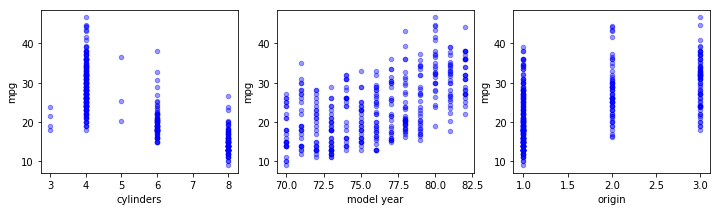

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

for xcol, ax in zip([ 'cylinders', 'model year', 'origin'], axes):
    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')

In the upper plots, we plotted the scatter plots for the continuous variables, and in the lower 3 plots, we plotted them for the categorical variables. You can tell the structure looks very different: instead of getting a pretty homogenous "cloud", our categorical variables creating scatter plots generates vertical lines, for discrete values. Another plot type that may ne useful looking at is the histogram.

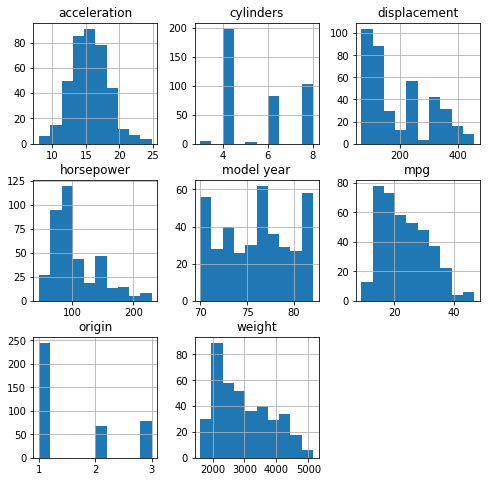

In [9]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
data.hist(ax = ax);

And the number of unique values.

## Transforming categorical variables

When you want to use categorical variables in regression models, they need to be transformed. There are two approaches to this:
- 1) Perform label encoding
- 2) Create dummy variables / one-hot-encoding

### Label encoding

Let's illustrate label encoding and dummy creation with the following Pandas Series with 3 categories: "USA", "EU" and "ASIA".

In [10]:
origin = ["USA", "EU", "EU", "ASIA","USA", "EU", "EU", "ASIA", "ASIA", "USA"]
origin_series = pd.Series(origin)

Now when calling the .dtype() 

Now you'll want to make sure Python recognizes there strings as categories. This can be done as follows:

In [11]:
cat_origin = origin_series.astype('category')
cat_origin

0     USA
1      EU
2      EU
3    ASIA
4     USA
5      EU
6      EU
7    ASIA
8    ASIA
9     USA
dtype: category
Categories (3, object): [ASIA, EU, USA]

Note how the dtype() here is category and the 3 categories are detected.

Sometimes you'll want to represent your labels as numbers. This is called label encoding.

You'll perform label encoding in a way that numerical labels are always between 0 and (number_of_categories)-1. There are several ways to do this, one way is using `.cat.codes`

In [12]:
cat_origin.cat.codes

0    2
1    1
2    1
3    0
4    2
5    1
6    1
7    0
8    0
9    2
dtype: int8

Another way is to use scikit-learn's LabelEncoder:

In [13]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

origin_encoded = lb_make.fit_transform(cat_origin)

In [14]:
origin_encoded

array([2, 1, 1, 0, 2, 1, 1, 0, 0, 2])

Note that where `.cat.codes` can only be used on variables that are transformed using `.astype(category)`, this is not a requirement to use `LabelEncoder`.

### Creating Dummy Variables

Another way to transform categorical variables is through using on-hot encoding or "dummy variables". The idea is to convert each category into anew column, and assign a 1 or 0 to the column. There are several libraries that support one-hot encoding, we'll cover 2 here:

In [15]:
pd.get_dummies(cat_origin)

,ASIA,EU,USA
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,0,0,1


See how the label name has become the column name! Another method is through using the LabelBinarizer in scikit-learn. 

In [16]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
origin_dummies = lb.fit_transform(cat_origin)
# you need to convert this back to a dataframe
origin_dum_df = pd.DataFrame(origin_dummies,columns=lb.classes_)

The advantage of using dummies is that, whatever algorithm you'll be using, your numerical values cannot be misinterpreted as being continuous. Going forward, it's important to know that for linear regression (and most other algorithms in scikit-learn), **one-hot encoding is required** when adding categorical variables in a regression model!

## Back to our auto-mpg data

Let's go ahead and change our "cylinders", "model year" and "origin" columns over to dummies

In [17]:
cyl_dummies = pd.get_dummies(data["cylinders"], prefix="cyl")
yr_dummies = pd.get_dummies(data["model year"], prefix="yr")
orig_dummies = pd.get_dummies(data["origin"], prefix="orig")

Next, we'll remove the original columns from our data and add the dummy columns instead

In [26]:
data = data.drop(["cylinders","model year","origin"], axis=1)

In [27]:
data = pd.concat([data, cyl_dummies, yr_dummies, orig_dummies], axis=1)
data.head()

,mpg,displacement,horsepower,weight,acceleration,car name,cyl_3,cyl_4,cyl_5,cyl_6,...,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,orig_1,orig_2,orig_3
0,18.0,307.0,130,3504,12.0,chevrolet chevelle malibu,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,15.0,350.0,165,3693,11.5,buick skylark 320,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,18.0,318.0,150,3436,11.0,plymouth satellite,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16.0,304.0,150,3433,12.0,amc rebel sst,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,17.0,302.0,140,3449,10.5,ford torino,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Summary
Great! In this lecture, you learned about categorical variables, and how to include them in your multiple linear regression model.